In [5]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [6]:
df = pd.read_csv("1429_1.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [7]:
df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


From the columns presented what we are really interested in working with to complete the sentiment analysis would be the reviews.text and reviews.rating. 

In [9]:
data = df[["id","reviews.text","reviews.rating"]]
# the id has been chosen because under name there are more missing values. 
# from the description the ID represents a device sold by Amazon

In [10]:
data.head() 

,id,reviews.text,reviews.rating
0,AVqkIhwDv8e3D1O-lebb,This product so far has not disappointed. My c...,5.0
1,AVqkIhwDv8e3D1O-lebb,great for beginner or experienced person. Boug...,5.0
2,AVqkIhwDv8e3D1O-lebb,Inexpensive tablet for him to use and learn on...,5.0
3,AVqkIhwDv8e3D1O-lebb,I've had my Fire HD 8 two weeks now and I love...,4.0
4,AVqkIhwDv8e3D1O-lebb,I bought this for my grand daughter when she c...,5.0


In [11]:
data.describe(include=["O"])

,id,reviews.text
count,34660,34659
unique,42,34659
top,AVphgVaX1cnluZ0-DR74,This streaming content box packs a lot of punc...
freq,10966,1


We can see how there are a total of 42 products (from the ID). Meaning that for every product we will have a mix of reviews (positive, neutral or negative).

We can see how one review.text is missing, hence no analysis can be done on this sample. We can then remove it. Furthermore, there are 32 missing values for the ratings. Due to the low number of missing values in the rating column it is possible to substitute the NaN with the mean of the others or we could simply remove those samples. Since we would have many samples anyway they can be simply removed.

In [13]:
data = data.dropna()

# Exploratory Data Analysis

We will start be veryfing what are the most common words used in the text reviews using a word cloud. However, since we haven't done the preprocessing before we might view some words that give little meaning to the sentiment of the text. 

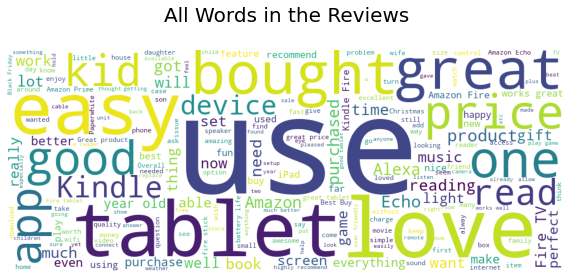

In [14]:
rt = data['reviews.text']
wordcloud = WordCloud(background_color='white',
                      width=1000,
                      height=400
                     ).generate(" ".join(rt))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.title('All Words in the Reviews\n',size=20)
plt.axis('off')
plt.show()

As expected there are words that have have no importance with the sentiment of the comment, such as: use, device, time etc. 
Now I will perform a word count of certain words that could describe the sentiment in a better way.

In [15]:
words = ['awesome','great','fantastic','extraordinary','amazing','super',
                 'magnificent','stunning','impressive','wonderful','breathtaking',
                 'love','content','pleased','happy','glad','satisfied','lucky',
                 'shocking','cheerful','wow','sad','unhappy','horrible','regret',
                 'bad','terrible','annoyed','disappointed','upset','awful','hate']

rt = " ".join(data['reviews.text'])

In [16]:
diz = {}
for word in rt.split(" "):
    if word in words:
        diz[word] = diz.get(word,0)+1
        

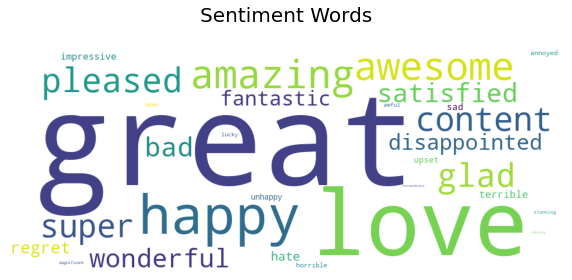

In [17]:
wordcloud = WordCloud(background_color='white',
                      width=1000,
                      height=400
                     ).generate_from_frequencies(diz)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.title('Sentiment Words\n',size=20)
plt.axis('off')
plt.show()

Most of the comments seem positive.
Now one thing that can be done is to view the average rating for every product. Unfortunately, the products are not well defined with a name due to the decision previously taken, but I will use the ID of the dataframe to represent the different products. 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


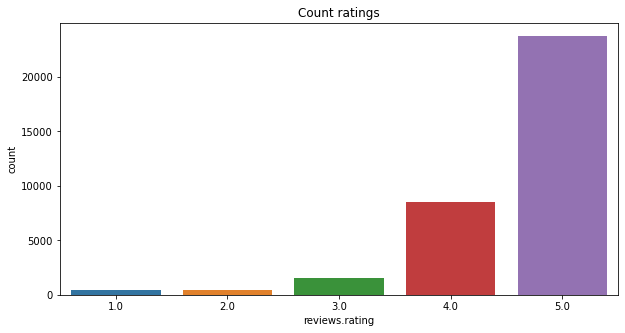

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(data['reviews.rating'])
plt.title('Count ratings')
plt.show()

In [19]:
data1 = data.groupby("id").mean().reset_index()

In [20]:
data1 = data1.sort_values(['reviews.rating']).reset_index()

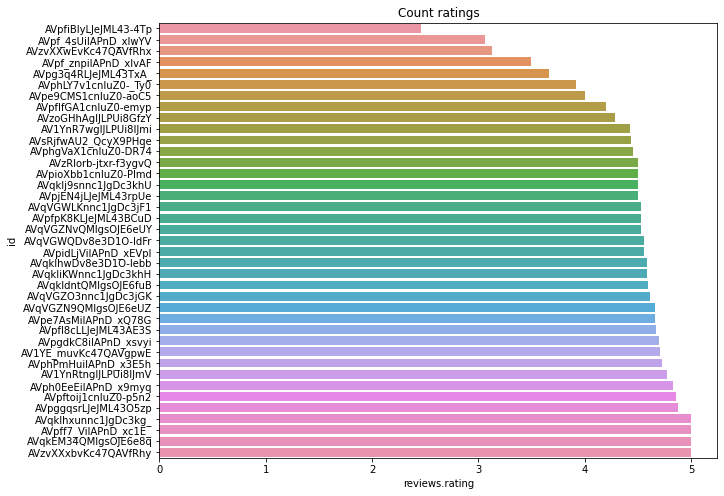

In [21]:
plt.figure(figsize=(10,8))
sns.barplot(x=data1["reviews.rating"], y=data1["id"])
plt.title('Count ratings')
plt.show()

We can clearly see how the reviews are heavily biased towards positive reviews. 4 and 5 ratings are extremely high and the averages are all above 3. To try and balance things out I will upload the other two csv files and get only the reviews that have ratings lower or equal to 3. So we are trying to oversample the lower rating reviews.

In [24]:
df2 = pd.read_csv("Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv")
df3 = pd.read_csv("Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv")

In [25]:
data2 = df2[["id","reviews.text","reviews.rating"]]
data3 = df3[["id","reviews.text","reviews.rating"]]

In [26]:
data2 = data2[data2["reviews.rating"]<=3]
data3 = data3[data3["reviews.rating"]<=3]

In [27]:
len(data2), len(data3)

(2787, 314)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


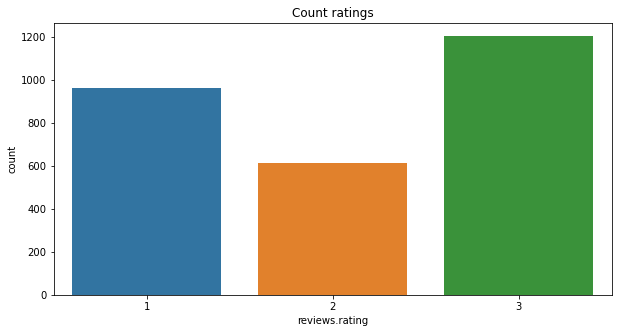

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(data2['reviews.rating'])
plt.title('Count ratings')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


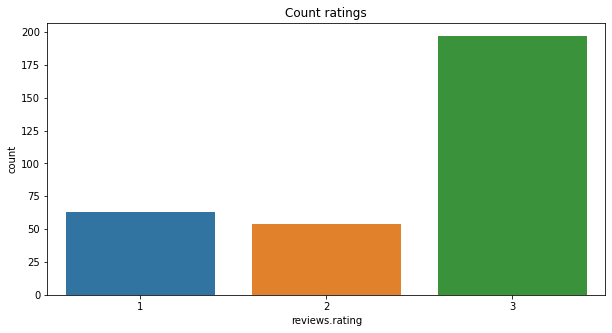

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(data3['reviews.rating'])
plt.title('Count ratings')
plt.show()

Now that all three datasets are available I will concatenate them together.

In [30]:
frames = [data, data2, data3]
final = pd.concat(frames)

Verifying if the data is a little bit less biased

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


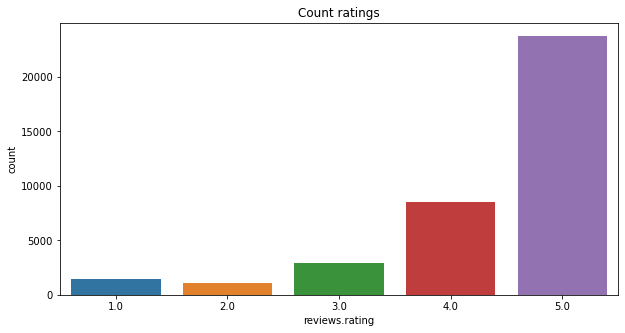

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(final['reviews.rating'])
plt.title('Count ratings')
plt.show()

The situation hasn't improved a lot but hopefully it will make a difference when training the model later on. A further approach could be to undersample the positive reviews. 

In [32]:
final.head()

,id,reviews.text,reviews.rating
0,AVqkIhwDv8e3D1O-lebb,This product so far has not disappointed. My c...,5.0
1,AVqkIhwDv8e3D1O-lebb,great for beginner or experienced person. Boug...,5.0
2,AVqkIhwDv8e3D1O-lebb,Inexpensive tablet for him to use and learn on...,5.0
3,AVqkIhwDv8e3D1O-lebb,I've had my Fire HD 8 two weeks now and I love...,4.0
4,AVqkIhwDv8e3D1O-lebb,I bought this for my grand daughter when she c...,5.0


# Preprocessing Text

In [33]:
#lower case all text
final["reviews.text"]=final["reviews.text"].str.lower() 

#tokenization of words
final['reviews.text'] = final.apply(lambda row: word_tokenize(row['reviews.text']), axis=1) 

#only alphanumerical values
final["reviews.text"] = final['reviews.text'].apply(lambda x: [item for item in x if item.isalpha()]) 

#lemmatazing words
final['reviews.text'] = final['reviews.text'].apply(lambda x : [WordNetLemmatizer().lemmatize(y) for y in x])

#removing useless words
stop = stopwords.words('english')
final['reviews.text'] = final['reviews.text'].apply(lambda x: [item for item in x if item not in stop])


In [34]:
final["reviews.text"] = final["reviews.text"].apply(lambda x: str(' '.join(x))) #joining all tokens

In [35]:
final.head()

,id,reviews.text,reviews.rating
0,AVqkIhwDv8e3D1O-lebb,product far ha disappointed child love use lik...,5.0
1,AVqkIhwDv8e3D1O-lebb,great beginner experienced person bought gift ...,5.0
2,AVqkIhwDv8e3D1O-lebb,inexpensive tablet use learn step nabi wa thri...,5.0
3,AVqkIhwDv8e3D1O-lebb,fire hd two week love tablet great prime membe...,4.0
4,AVqkIhwDv8e3D1O-lebb,bought grand daughter come visit set user ente...,5.0


In [36]:
sentiment = {1: 0,
            2: 0,
            3: 0,
            4: 1,
            5: 1}

final["sentiment"] = final["reviews.rating"].map(sentiment)

In [37]:
final.head()

,id,reviews.text,reviews.rating,sentiment
0,AVqkIhwDv8e3D1O-lebb,product far ha disappointed child love use lik...,5.0,1
1,AVqkIhwDv8e3D1O-lebb,great beginner experienced person bought gift ...,5.0,1
2,AVqkIhwDv8e3D1O-lebb,inexpensive tablet use learn step nabi wa thri...,5.0,1
3,AVqkIhwDv8e3D1O-lebb,fire hd two week love tablet great prime membe...,4.0,1
4,AVqkIhwDv8e3D1O-lebb,bought grand daughter come visit set user ente...,5.0,1


In [38]:
len(final[final["sentiment"]==0]),len(final[final["sentiment"]==1])

(5412, 32315)

In [39]:
# building tfidf matrix to train models 
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer =TfidfVectorizer(max_df=0.9)
text = vectorizer.fit_transform(final["reviews.text"])

# Model Selection

In [40]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(text, final["sentiment"], test_size=0.3, random_state=1)



In [41]:
# try logistic regression first
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=1)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_pred_tr = classifier.predict(x_train)


In [42]:
print('Test accuracy', sum(y_test == y_pred)/len(y_test))
print('Train accuracy', sum(y_train == y_pred_tr)/len(y_train))

Test accuracy 0.9115646258503401
Train accuracy 0.930513480763405


In [43]:
from sklearn.metrics import classification_report
print("Classification Report(Train)")
print(classification_report(y_train, y_pred_tr))
print("Classification Report(Test)")
print(classification_report(y_test, y_pred))

Classification Report(Train)
              precision    recall  f1-score   support

           0       0.92      0.56      0.70      3769
           1       0.93      0.99      0.96     22639

    accuracy                           0.93     26408
   macro avg       0.92      0.78      0.83     26408
weighted avg       0.93      0.93      0.92     26408

Classification Report(Test)
              precision    recall  f1-score   support

           0       0.83      0.49      0.62      1643
           1       0.92      0.98      0.95      9676

    accuracy                           0.91     11319
   macro avg       0.88      0.74      0.78     11319
weighted avg       0.91      0.91      0.90     11319



In [44]:
y_pred_tr

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [45]:
# Random Forests
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_pred_tr = classifier.predict(x_train)



In [46]:
print('Test accuracy', sum(y_test == y_pred)/len(y_test))
print('Train accuracy', sum(y_train == y_pred_tr)/len(y_train))

Test accuracy 0.9340047707394646
Train accuracy 0.9994319903059679


In [47]:
print("Classification Report(Train)")
print(classification_report(y_train, y_pred_tr))
print("Classification Report(Test)")
print(classification_report(y_test, y_pred))

Classification Report(Train)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3769
           1       1.00      1.00      1.00     22639

    accuracy                           1.00     26408
   macro avg       1.00      1.00      1.00     26408
weighted avg       1.00      1.00      1.00     26408

Classification Report(Test)
              precision    recall  f1-score   support

           0       0.91      0.61      0.73      1643
           1       0.94      0.99      0.96      9676

    accuracy                           0.93     11319
   macro avg       0.92      0.80      0.84     11319
weighted avg       0.93      0.93      0.93     11319



In [48]:
y_pred_tr

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

# 3 Labels
Trying with neutral, negative and positive

In [49]:
sentiment = {1: 0,
            2: 0,
            3: 1,
            4: 2,
            5: 2}

final["sentiment"] = final["reviews.rating"].map(sentiment)

In [50]:
final.head()

,id,reviews.text,reviews.rating,sentiment
0,AVqkIhwDv8e3D1O-lebb,product far ha disappointed child love use lik...,5.0,2
1,AVqkIhwDv8e3D1O-lebb,great beginner experienced person bought gift ...,5.0,2
2,AVqkIhwDv8e3D1O-lebb,inexpensive tablet use learn step nabi wa thri...,5.0,2
3,AVqkIhwDv8e3D1O-lebb,fire hd two week love tablet great prime membe...,4.0,2
4,AVqkIhwDv8e3D1O-lebb,bought grand daughter come visit set user ente...,5.0,2


In [51]:
len(final[final["sentiment"]==0]),len(final[final["sentiment"]==1]),len(final[final["sentiment"]==2])

(2510, 2902, 32315)

Again we can see how it is heavily biased towards the positive sentiment. 

In [52]:
# building tfidf matrix to train models 
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer =TfidfVectorizer(max_df=0.9)
text = vectorizer.fit_transform(final["reviews.text"])

In [53]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(text, final["sentiment"], test_size=0.3, random_state=1)



In [54]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=1)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_pred_tr = classifier.predict(x_train)


C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
print('Test accuracy', sum(y_test == y_pred)/len(y_test))
print('Train accuracy', sum(y_train == y_pred_tr)/len(y_train))

Test accuracy 0.8991960420531849
Train accuracy 0.9228642835504393


In [56]:
from sklearn.metrics import classification_report
print("Classification Report(Train)")
print(classification_report(y_train, y_pred_tr))
print("Classification Report(Test)")
print(classification_report(y_test, y_pred))

Classification Report(Train)
              precision    recall  f1-score   support

           0       0.87      0.68      0.76      1765
           1       0.82      0.32      0.46      2004
           2       0.93      0.99      0.96     22639

    accuracy                           0.92     26408
   macro avg       0.87      0.67      0.73     26408
weighted avg       0.92      0.92      0.91     26408

Classification Report(Test)
              precision    recall  f1-score   support

           0       0.75      0.56      0.64       745
           1       0.64      0.23      0.34       898
           2       0.91      0.99      0.95      9676

    accuracy                           0.90     11319
   macro avg       0.77      0.59      0.64     11319
weighted avg       0.88      0.90      0.88     11319



In [57]:
y_pred_tr

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

Very low F1 score for the test data set for the undersampled data sets. We'll try with the Randm Forest algorithm again.

In [58]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_pred_tr = classifier.predict(x_train)



In [59]:
print('Test accuracy', sum(y_test == y_pred)/len(y_test))
print('Train accuracy', sum(y_train == y_pred_tr)/len(y_train))

Test accuracy 0.924374944783108
Train accuracy 0.9988639806119358


In [60]:
print("Classification Report(Train)")
print(classification_report(y_train, y_pred_tr))
print("Classification Report(Test)")
print(classification_report(y_test, y_pred))

Classification Report(Train)
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1765
           1       1.00      0.99      0.99      2004
           2       1.00      1.00      1.00     22639

    accuracy                           1.00     26408
   macro avg       1.00      1.00      1.00     26408
weighted avg       1.00      1.00      1.00     26408

Classification Report(Test)
              precision    recall  f1-score   support

           0       0.84      0.62      0.72       745
           1       0.90      0.42      0.57       898
           2       0.93      0.99      0.96      9676

    accuracy                           0.92     11319
   macro avg       0.89      0.68      0.75     11319
weighted avg       0.92      0.92      0.91     11319



In [61]:
y_pred_tr

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)